Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine?

The key features of the wine quality data set is fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,pH.,alcohol.
These are the important features for predicting the quality of wine because the mixing amount of these features are maximum these may impact on quality of the data set.

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques?

we handle the missing data by these techniques:
we can fill nan value to the missing value .
we can find average of that column and fillup that missing value by this average value .
we can find mean of that columnand fillup that missing value by this mean value .
we can find median of that columnand fillup that missing value by this median value .

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

The standard lunch is the main key factors that affect student's performance in exams.
we are analyzing these tecniques by using correlation technique of statistics.

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

a)Check missing values 
b)Check Duplicates 
c)Check data type
d)Check the number of unique values of each column
e)Check the statistics of data set
f)Check various categories present in the categorical column


Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [18]:
import pandas as pd
df=pd.read_csv('winequality-red.csv')



In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot: xlabel='fixed acidity', ylabel='Count'>

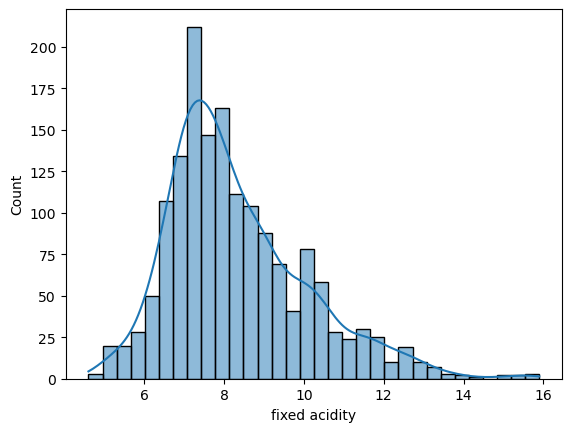

In [20]:
import seaborn as sns 
sns.histplot(df['fixed acidity'],kde=True)


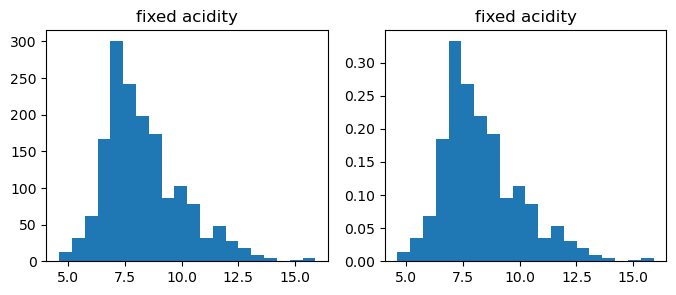

Shapiro-Wilk test for fixed acidity: p-value=0.0000


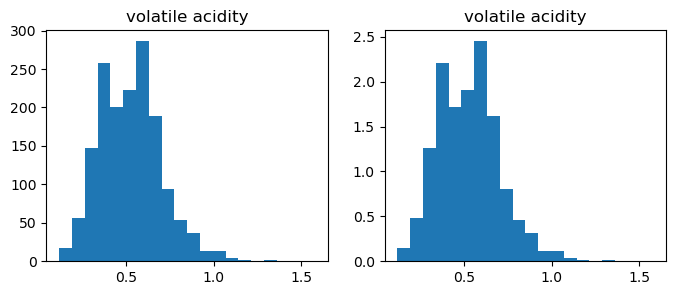

Shapiro-Wilk test for volatile acidity: p-value=0.0000


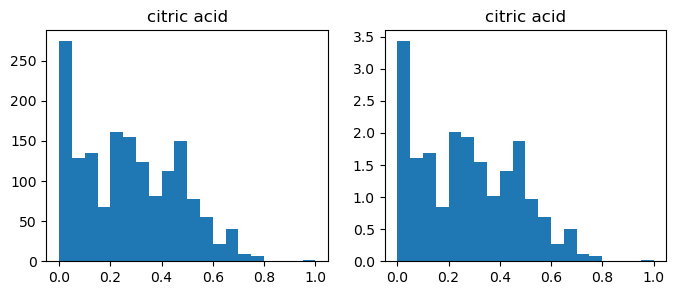

Shapiro-Wilk test for citric acid: p-value=0.0000


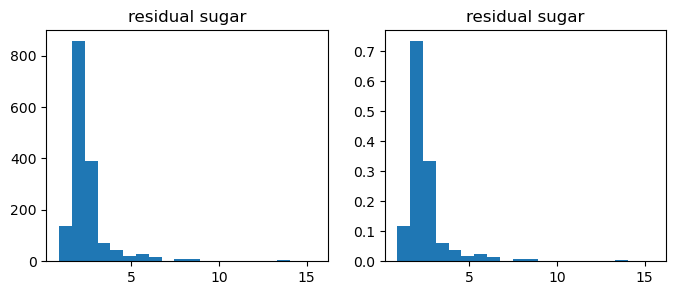

Shapiro-Wilk test for residual sugar: p-value=0.0000


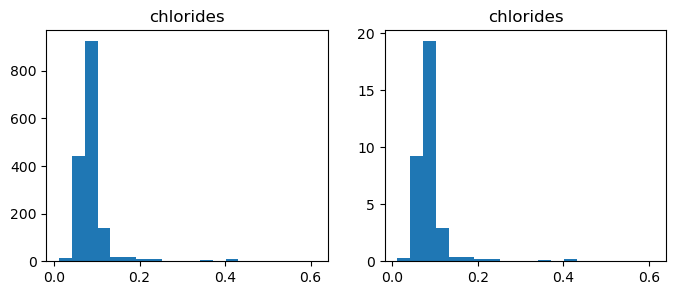

Shapiro-Wilk test for chlorides: p-value=0.0000


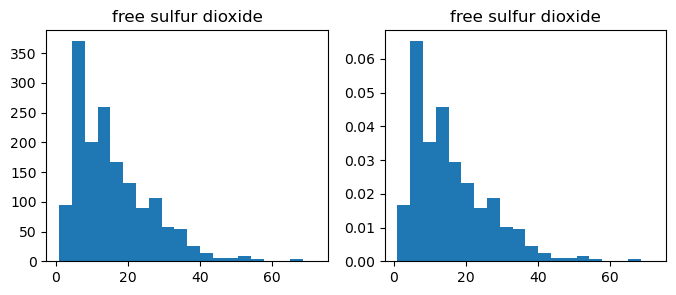

Shapiro-Wilk test for free sulfur dioxide: p-value=0.0000


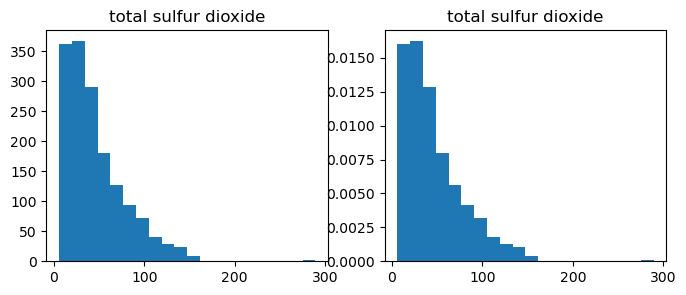

Shapiro-Wilk test for total sulfur dioxide: p-value=0.0000


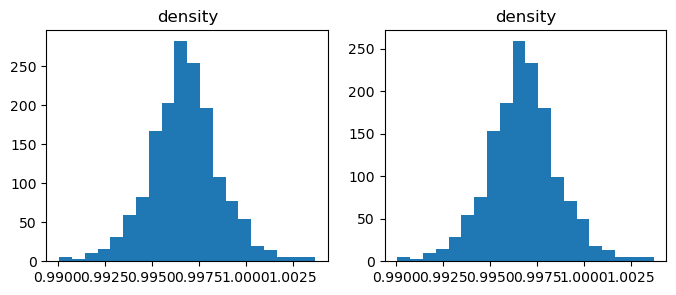

Shapiro-Wilk test for density: p-value=0.0000


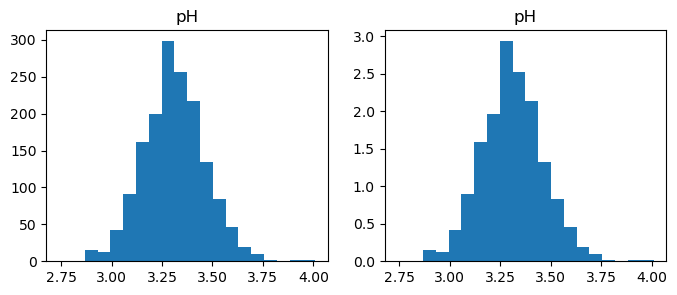

Shapiro-Wilk test for pH: p-value=0.0000


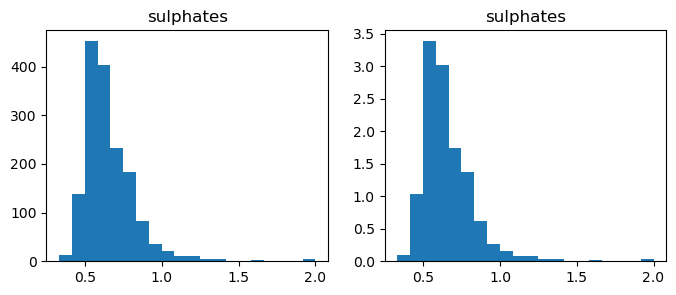

Shapiro-Wilk test for sulphates: p-value=0.0000


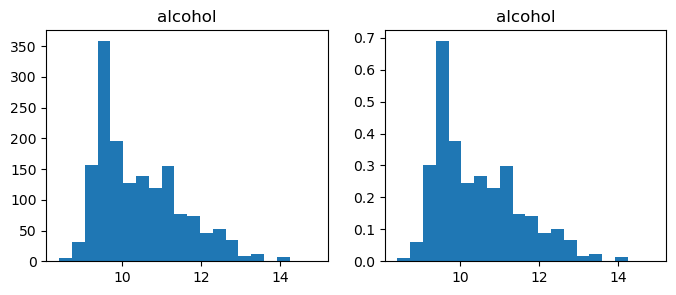

Shapiro-Wilk test for alcohol: p-value=0.0000


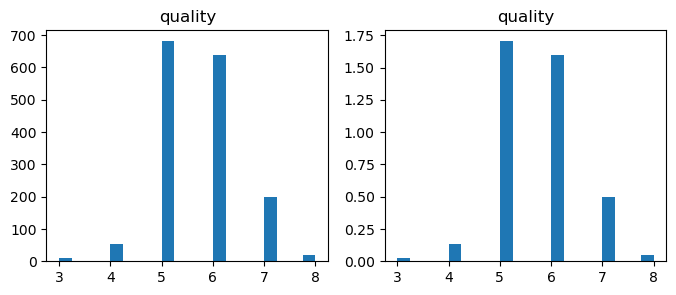

Shapiro-Wilk test for quality: p-value=0.0000


In [21]:
from scipy.stats import shapiro

# iterate over each column and plot histogram and density plot, and perform shapiro test
for column in df.columns:
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=20)
    plt.title(column)
    plt.subplot(1, 2, 2)
    plt.title(column)
    plt.hist(df[column], density=True, bins=20)
    plt.show()
    stat, p = shapiro(df[column])
    print(f'Shapiro-Wilk test for {column}: p-value={p:.4f}')


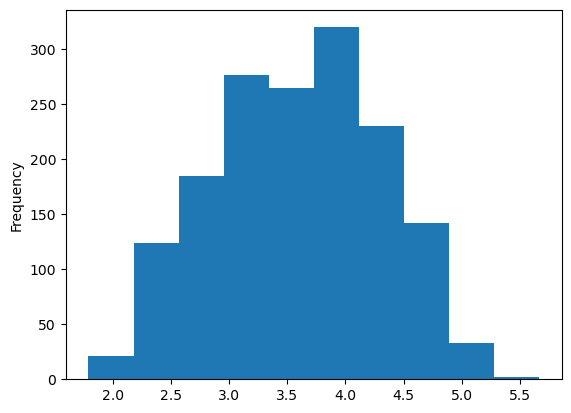

In [22]:
import numpy as np

df['total sulfur dioxide log'] = np.log(df['total sulfur dioxide'])
df['total sulfur dioxide log'].plot(kind='hist')
plt.show()


Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('winequality-red.csv')


In [24]:
# Separate independent variables (features) from dependent variable (quality)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [25]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [26]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Find the minimum number of principal components required to explain 90% of the variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_explained_variance_ratio >= 0.9) + 1
print("Minimum number of principal components required to explain 90% of the variance:", num_components)


Minimum number of principal components required to explain 90% of the variance: 7
